In [1]:
# IMPORT TẤT CẢ THƯ VIỆN PHÂN LOẠI
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
# https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
# https://rstudio-pubs-static.s3.amazonaws.com/267441_5459af9d83ae44f18a13aea4a479f31f.html

In [2]:
train_df = pd.read_csv(r'C:\PYTHON LEARNING\DATA\full stack classification\train.csv')
test_df = pd.read_csv(r'C:\PYTHON LEARNING\DATA\full stack classification\test.csv')
combine = [train_df, test_df]
train_df = pd.DataFrame(train_df)
test_df = pd.DataFrame(test_df)

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# CÁC GIẢ ĐỊNH CỦA MÔ HÌNH
# Phụ nữ (Giới tính = nữ) có nhiều khả năng sống sót hơn hay không?
# Trẻ em (Tuổi <?) Có nhiều khả năng sống sót hơn hay không?
# Những hành khách hạng trên (Pgroup = 1) có nhiều khả năng sống sót hơn hay không?
# Tuổi trẻ hơn có khả năng sống sót hơn hay không?
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


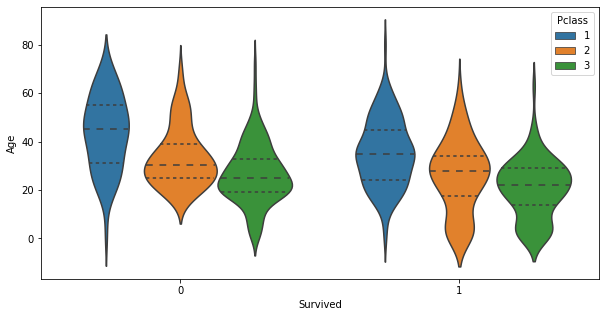

In [9]:
plt.figure(figsize=(10,5))
sns.violinplot(y="Age",x="Survived", data=train_df,inner="quartile",hue='Pclass')

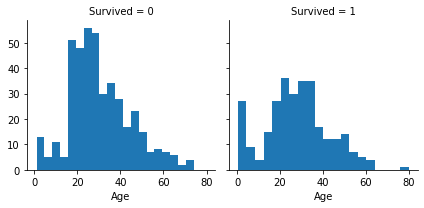

In [10]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


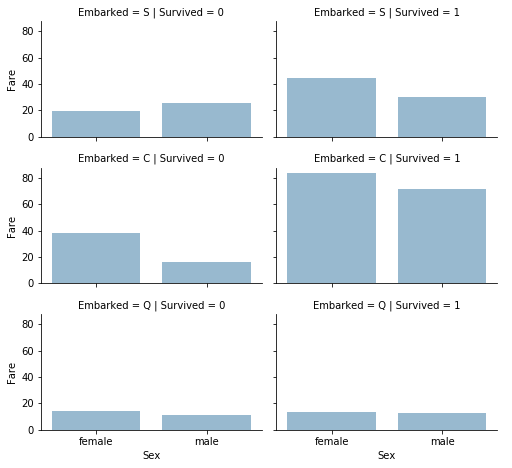

In [11]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [12]:
train_df = train_df.drop(['Name','Ticket','Cabin'], axis=1)
train_df=train_df.dropna()
test_df = test_df.drop(['Name','Ticket','Cabin'], axis=1)
test_df=test_df.dropna()
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [13]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1.0,1,0,7.2500,S
1,2,1,1,female,2.0,1,0,71.2833,C
2,3,1,3,female,1.0,0,0,7.9250,S
3,4,1,1,female,2.0,1,0,53.1000,S
4,5,0,3,male,2.0,0,0,8.0500,S


In [14]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.777778
2,3,0.569892
1,2,0.546763
6,7,0.333333
0,1,0.318408
4,5,0.272727
5,6,0.136364
7,8,0.000000


In [15]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.516129
1,1,0.318408


In [16]:
train_df = train_df.drop(['SibSp','Parch'], axis=1)
train_df=train_df.dropna()
test_df = test_df.drop(['SibSp','Parch'], axis=1)
test_df=test_df.dropna()
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,male,1.0,7.2500,S,2,0
1,2,1,1,female,2.0,71.2833,C,2,0
2,3,1,3,female,1.0,7.9250,S,1,1
3,4,1,1,female,2.0,53.1000,S,2,0
4,5,0,3,male,2.0,8.0500,S,1,1


In [17]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)
combine = [train_df, test_df]
train_df=train_df.drop("PassengerId", axis=1)
train_df.head()

,Survived,Pclass,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1.0,7.2500,2,0,0,1,0,0,1
1,1,1,2.0,71.2833,2,0,1,0,1,0,0
2,1,3,1.0,7.9250,1,1,1,0,0,0,1
3,1,1,2.0,53.1000,2,0,1,0,0,0,1
4,0,3,2.0,8.0500,1,1,0,1,0,0,1


In [18]:
test_df.head()

,PassengerId,Pclass,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,2.0,7.8292,1,1,0,1,0,1,0
1,893,3,2.0,7.0000,2,0,1,0,0,0,1
2,894,2,3.0,9.6875,1,1,0,1,0,1,0
3,895,3,1.0,8.6625,1,1,0,1,0,0,1
4,896,3,1.0,12.2875,3,0,1,0,0,0,1


In [19]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((712, 10), (712,), (331, 10))

In [20]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print('Logistic Regression Score', acc_log)

# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print('Support Vector Machines Score', acc_svc)

# K Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print('K Neighbors Classifier', acc_svc)

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print('aussian Naive Bayes Score', acc_gaussian)

# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print('Perceptron Score', acc_perceptron)

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print('PLinear SVC Score', acc_perceptron)

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print('Stochastic Gradient Descent Score', acc_sgd)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print('Decision Tree Score', acc_decision_tree)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print('Random Forest Score', acc_random_forest)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Logistic Regression Score 79.63
Support Vector Machines Score 67.98
K Neighbors Classifier 67.98
aussian Naive Bayes Score 76.69
Perceptron Score 76.69
PLinear SVC Score 76.69
Stochastic Gradient Descent Score 76.12
Decision Tree Score 94.38
Random Forest Score 94.38


In [21]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,94.38
8,Decision Tree,94.38
1,KNN,87.08
2,Logistic Regression,79.63
7,Linear SVC,79.49
4,Naive Bayes,76.69
5,Perceptron,76.69
6,Stochastic Gradient Decent,76.12
0,Support Vector Machines,67.98
